# Explore student grade data

Follow the youtube video: https://www.youtube.com/watch?v=C_0mtbAWNtQ. Use the Github repository mslearn-introduction-to-machine-learning.

In [7]:
import pandas as pd

# Read the text file containing data using pandas
df_students = pd.read_csv('Data/ml-basics/grades.csv')

df_students.shape

(24, 3)

In [10]:
type(df_students)b

pandas.core.frame.DataFrame

In [9]:
df_students[df_students.isna().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [8]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [11]:
df_students = df_students.dropna(axis=0)


In [12]:
df_students.shape

(22, 3)

In [15]:
avg_study_hr = df_students['StudyHours'].mean()
avg_grade = df_students['Grade'].mean()

print(f'Average study hours: {avg_study_hr} \n Average grade: {avg_grade}')

Average study hours: 10.522727272727273 
 Average grade: 49.18181818181818


In [16]:
df_students[df_students.StudyHours > avg_study_hr]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [17]:
df_students[df_students.Grade >= 60]

,Name,StudyHours,Grade
3,Rosie,16.00,97.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [19]:
passed = pd.Series(df_students['Grade'] >= 60)

passed 

df_students = pd.concat([df_students, passed.rename("Passed")], axis=1)

In [23]:
df_students.groupby('Passed').Name.count()


Passed
False    15
True      7
Name: Name, dtype: int64

In [24]:
study_hr_mean = df_students.groupby('Passed').StudyHours.mean()
grade_mean = df_students.groupby('Passed').Grade.mean()

print(f'Study hours mean: \n {study_hr_mean} \n Grade mean: \n {grade_mean}')

Study hours mean: 
 Passed
False     8.783333
True     14.250000
Name: StudyHours, dtype: float64 
 Grade mean: 
 Passed
False    38.000000
True     73.142857
Name: Grade, dtype: float64


In [26]:
df_students.groupby('Passed')[['Grade', 'StudyHours']].mean()

,Grade,StudyHours
Passed,,
False,38.000000,8.783333
True,73.142857,14.250000


In [31]:
# It needs double [[]] here to print the result in a table format.
df_temp = df_students.groupby(df_students.Passed)[['Grade', 'StudyHours']].mean()

print(df_temp)

            Grade  StudyHours
Passed                       
False   38.000000    8.783333
True    73.142857   14.250000


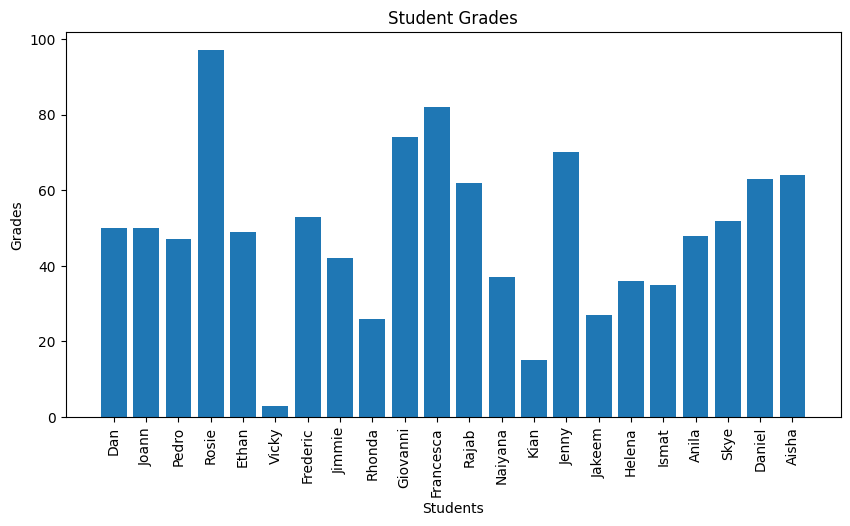

In [34]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 5))

plt.bar(df_students.Name, df_students.Grade)
plt.xlabel('Students')
plt.ylabel('Grades')
plt.title('Student Grades')
plt.xticks(rotation=90)

plt.show()